# Fall 2021 Data Science Intern Challenge 

### Content

 1. Question 1 
 2. Question 2 

## 1. Question 1 

Given some sample data, write a program to answer the following: [click here to access the required data set](https://docs.google.com/spreadsheets/d/16i38oonuX1y1g7C_UAmiK9GkY7cS-64DfiDMNiR41LM/edit#gid=0)

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis.

### a) Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 

In [1]:
import pandas as pd

In [29]:
df = pd.read_excel('2019 Winter Data Science Intern Challenge Data Set.xlsx')

df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56.190022
1,2,92,925,90,1,cash,2017-03-03 17:38:51.999116
2,3,44,861,144,1,cash,2017-03-14 04:23:55.594730
3,4,18,935,156,1,credit_card,2017-03-26 12:43:36.648760
4,5,18,883,156,1,credit_card,2017-03-01 04:35:10.772536


By using simple calculation I found that AOV of 3145.13 came from the mean value of the order_amount column in the dataset.

In [23]:
round((df['order_amount'].mean()), 2)

3145.13

In [33]:
df.order_amount.describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

So, by using describe() method I mentioned that first quartile, median and third quartile values are much lower than maximum value. Therefore, I can notice that this column has outliers. Below to prove my assumption I ploted boxplot of the order_amount column. As you can see from the above boxplot, this column has outliers.

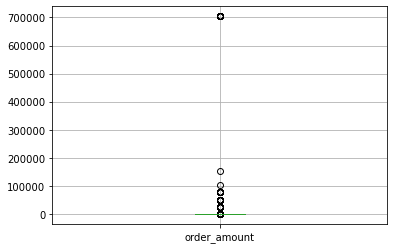

In [35]:
df.boxplot('order_amount');

To remove outliers I used IQR rule. 

In [38]:
Q1 = df['order_amount'].quantile(0.25)
Q3 = df['order_amount'].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df['order_amount'] < (Q1 - 1.5 * IQR)) |(df['order_amount'] > (Q3 + 1.5 * IQR)))]

It would be preferable to use a robust evaluation metric since the outliers occurs.

### b) What metric would you report for this dataset?

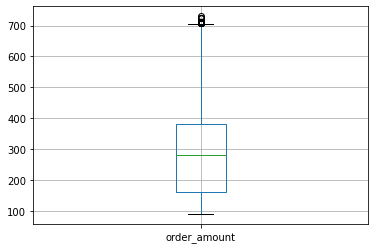

In [41]:
df.boxplot('order_amount');

#### Answer: In order to prevent evaluation metric from the effects of outliers for this dataset I would report the median value.

### c) What is its value?

#### Answer: From the above, you can see the real AOV value is 280

In [42]:
round((df['order_amount'].median()), 2)

280.0

## 2. Question 2

For this question you’ll need to use SQL. [Follow this link](https://www.w3schools.com/SQL/TRYSQL.ASP?FILENAME=TRYSQL_SELECT_ALL) to access the data set required for the challenge. Please use queries to answer the following questions. Paste your queries along with your final numerical answers below.

### a) How many orders were shipped by Speedy Express in total?

#### Answer: 54 

SELECT COUNT(o.OrderID)                                                                                                         
FROM Orders o                                                                                                                   
JOIN Shippers s ON s.ShipperID = o.ShipperID                                                                                   
WHERE s.ShipperName = 'Speedy Express';

### b) What is the last name of the employee with the most orders?

#### Answer: Peacock

SELECT e.LastName FROM ORDERS o                                                                                                 
JOIN Employees e ON e.EmployeeID = o.EmployeeID                                                                                 
GROUP BY e.LastName                                                                                                             
ORDER BY COUNT(o.OrderID) DESC                                                                                                 
LIMIT 1




### c) What product was ordered the most by customers in Germany?

#### Answer: Boston Crab Meat

SELECT p.ProductName FROM ORDERDETAILS od                                                                                       
JOIN Products p ON p.ProductID = od.ProductID                                                                                   
JOIN Orders o ON o.OrderID = od.OrderID                                                                                         
JOIN Customers c ON c.CustomerID = o.CustomerID                                                                                 
WHERE c.Country = 'Germany'                                                                                                     
GROUP BY ProductName                                                                                                           
ORDER BY SUM(Quantity) DESC                                                                                                     
LIMIT 1                                                                                                                         